# Demo for `autodiff.optimize`

In [8]:
import numpy              as np
from   autodiff.forward   import *
import autodiff.optimize  as opt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot  as plt
%matplotlib inline

We included several basic optimization routines built on `autodiff.forward`. Here we'll use the Rosenbrock function to demonstrate the use of these optimization routines. The Rosenbrock function is defined as $f(x, y) = (a-x)^2 + b(y-x^2)^2$. Here we use $a=1, b=100$.

In [2]:
x, y = Variable(), Variable()
f = (1-x)**2 + 100*(y-x**2)**2

In [3]:
us, vs = np.linspace(-2, 1.5, 200), np.linspace(0.0, 3.5, 200)
uu, vv = np.meshgrid(us, vs)
values = f.evaluation_at({x: uu, y:vv})

The landscape of the function looks like below. The global minimum is at $[-1, 1]$, it is marked by the red star.

In [32]:
def plt_surf(uu, vv, zz, traj=None, show_dest=False, show_traj=False):
    fig  = plt.figure(figsize=(16, 8))
    ax   = Axes3D(fig)  
    if show_traj: ax.plot(traj[0], traj[1], traj[2], marker='>', markersize=7, c='orange')
    if show_dest: ax.plot([1.0], [1.0], [0.0], marker='*', markersize=15, c='red')
    surf = ax.plot_surface(uu, vv, zz, rstride=2, cstride=2, alpha=0.8, cmap='cool')  
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_proj_type('ortho')
    plt.show()

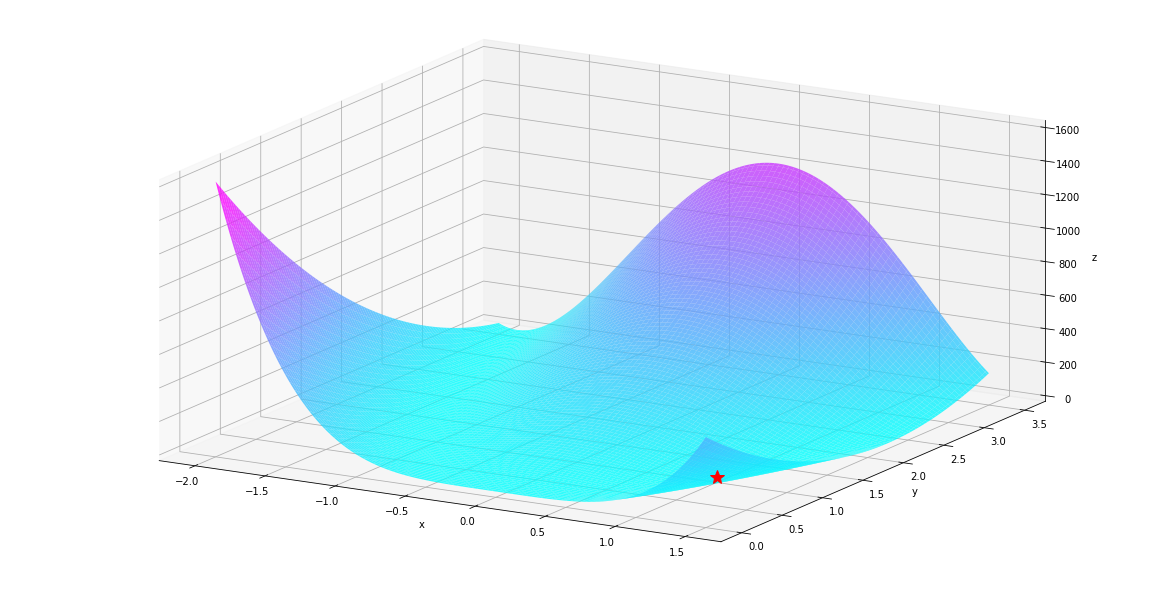

In [33]:
plt_surf(uu, vv, values, show_dest=True)

## `autodiff.optimize.gradient_descent`

Let's say we start from $(0.0, 3.0)$. We'll first use gradient descent to find the miminum. The gradient descent is implemented in `autodiff.optimize.gradient_descent`. Here we set the argument `return_history=True` to return a whole history of optimization.

In [36]:
hist = opt.gradient_descent(f, init_val_dict={x: 0.0, y: 3.0}, max_iter=10000, 
                            return_history=True)

We can plot our optimization path as below. We can see that gradient descent approaches the minimum slowly because the gradient around the minimum is small.

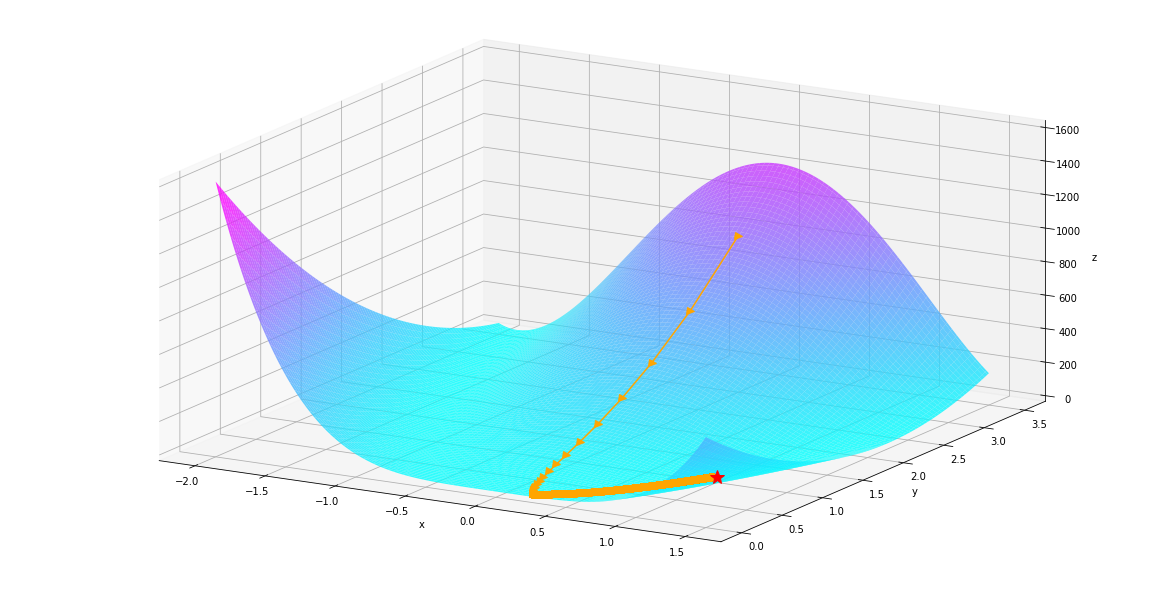

In [37]:
hist = np.array(hist)
us, vs = hist[:, 0].flatten(), hist[:, 1].flatten()
zs     = f.evaluation_at({x: us, y: vs})
plt_surf(uu, vv, values, (us, vs, zs), show_dest=True, show_traj=True)

## `autodiff.optimize.newton`

We'll then use Newton's method to find the miminum. The Newton's method is implemented in `autodiff.optimize.newton`. Here we set the argument `return_history=True` to return a whole history of optimization.

In [38]:
hist = opt.newton(f, init_val_dict={x: 0.0, y: 3.0}, max_iter=10000, 
                  return_history=True)

We can plot our optimization path as below. The Newton's method makes use of second-derivative information. We can see that the Newton's method takes much fewer steps to reach the minimum.

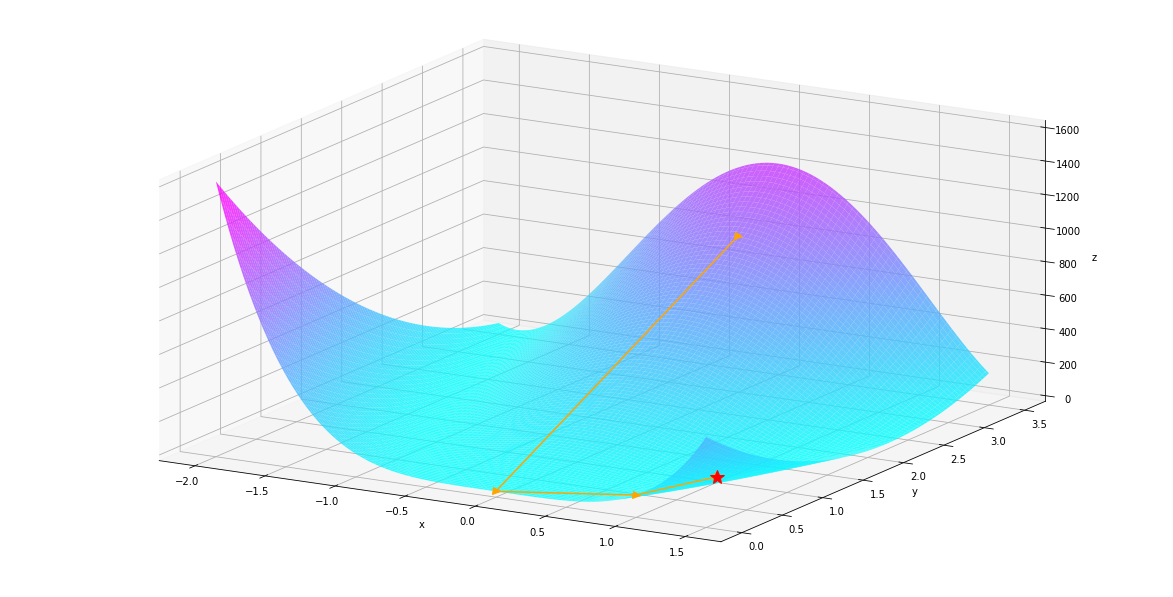

In [40]:
hist = np.array(hist)
us, vs = hist[:, 0].flatten(), hist[:, 1].flatten()
zs     = f.evaluation_at({x: us, y: vs})
plt_surf(uu, vv, values, (us, vs, zs), show_dest=True, show_traj=True)

## `autodiff.optimize.bfgs`

Lastly, we'll use BFGS to find the miminum. BFGS is a quasi-Newton method that approximates the Hessian matrix while doing the optimization. The optimization path of BFGS can be quite hysterical, so we'll just show the optimization result. It is $[1.0, 1.0]$ as we expected.

In [42]:
res = opt.bfgs(f, init_val_dict={x: 0.0, y: 3.0})

In [43]:
print(res[x], res[y])

1.000000000005812 1.0000000000112632
